In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('calories.csv')
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [105]:
cal = pd.read_csv("calories.csv")
ex = pd.read_csv("exercise.csv")

df = ex.merge(cal, on="User_ID", how="inner")

In [106]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

df['HRxDuration'] = df['Heart_Rate'] * df['Duration']
df['WeightxDuration'] = df['Weight'] * df['Duration']
df['Temp_centered'] = df['Body_Temp'] - df['Body_Temp'].mean()


df[['Height','Weight','BMI','HRxDuration','WeightxDuration','Temp_centered']].head()

,Height,Weight,BMI,HRxDuration,WeightxDuration,Temp_centered
0,190.0,94.0,26.038781,3045.0,2726.0,0.774547
1,166.0,60.0,21.773842,1316.0,840.0,0.274547
2,179.0,79.0,24.655910,440.0,395.0,-1.325453
3,179.0,71.0,22.159109,1300.0,923.0,0.474547
4,154.0,58.0,24.456063,810.0,580.0,-0.225453


In [107]:
df.shape

(15000, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          15000 non-null  int64  
 1   Gender           15000 non-null  object 
 2   Age              15000 non-null  int64  
 3   Height           15000 non-null  float64
 4   Weight           15000 non-null  float64
 5   Duration         15000 non-null  float64
 6   Heart_Rate       15000 non-null  float64
 7   Body_Temp        15000 non-null  float64
 8   Calories         15000 non-null  float64
 9   BMI              15000 non-null  float64
 10  HRxDuration      15000 non-null  float64
 11  WeightxDuration  15000 non-null  float64
 12  Temp_centered    15000 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.5+ MB


In [109]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,HRxDuration,WeightxDuration,Temp_centered
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533,24.344900,1551.451133,1164.044733,-5.096486e-15
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978,1.558784,927.577028,675.731199,7.792299e-01
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,19.227688,67.000000,49.000000,-2.925453e+00
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,23.243408,737.500000,606.000000,-4.254533e-01
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,24.376731,1472.000000,1122.000000,1.745467e-01
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,25.492722,2323.000000,1650.000000,5.745467e-01
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,29.069767,3840.000000,3570.000000,1.474547e+00


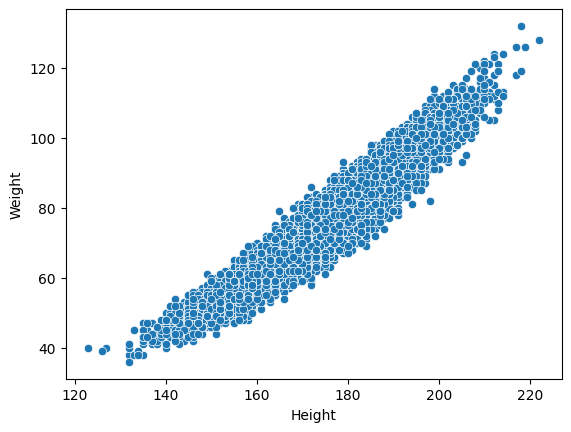

In [110]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

In [111]:
df.columns = df.columns.str.strip()


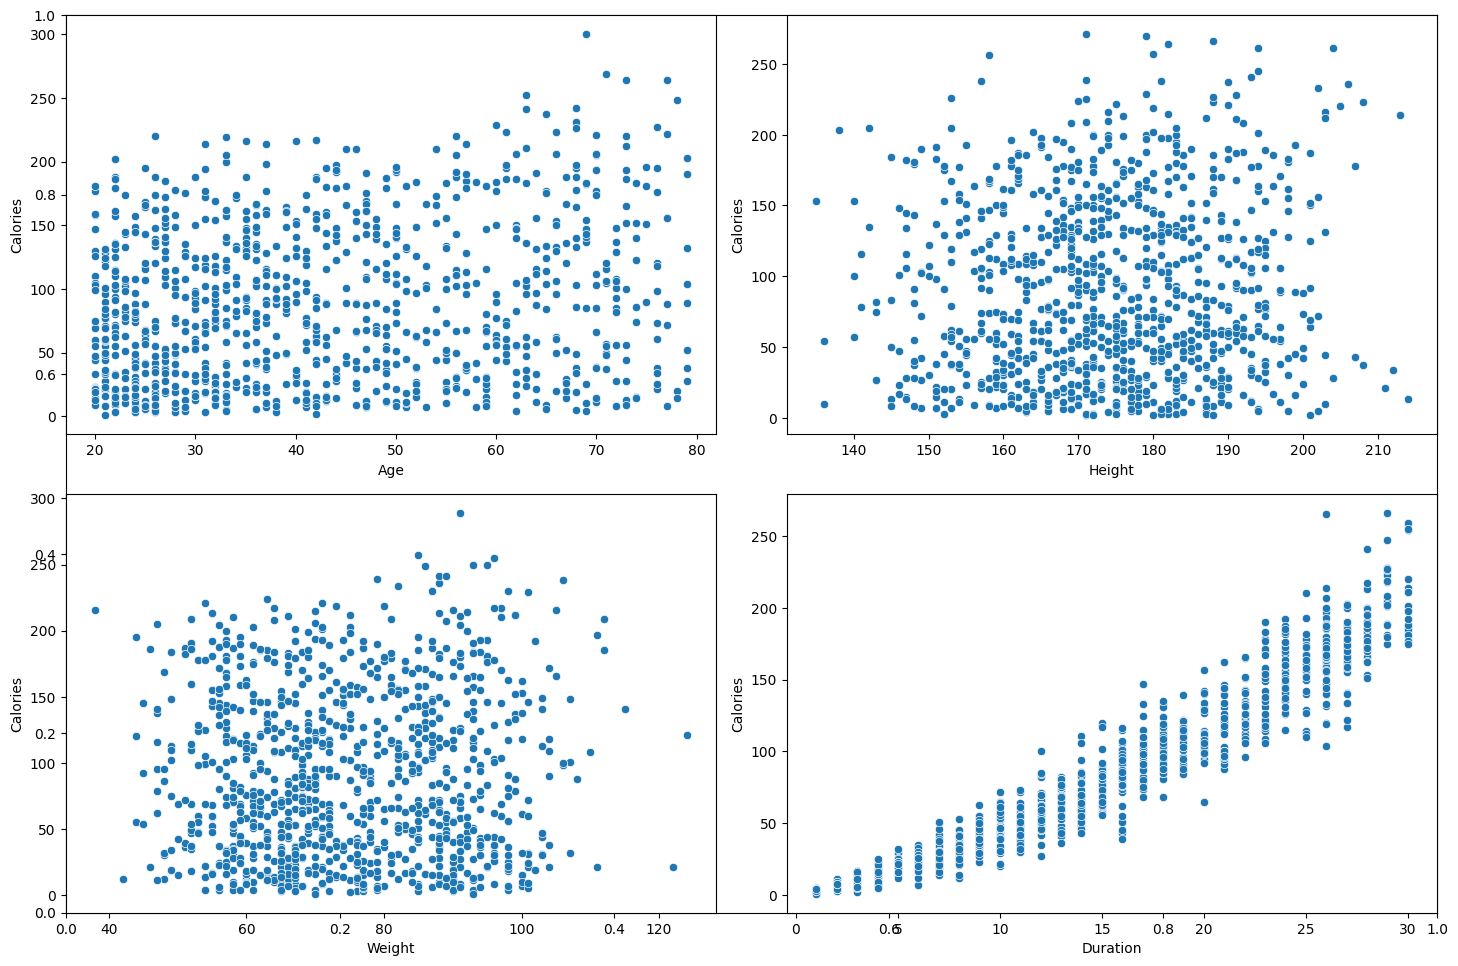

In [112]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
                                        plt.subplot(2, 2, i+1)
                                        x = df.sample(1000)
                                        sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

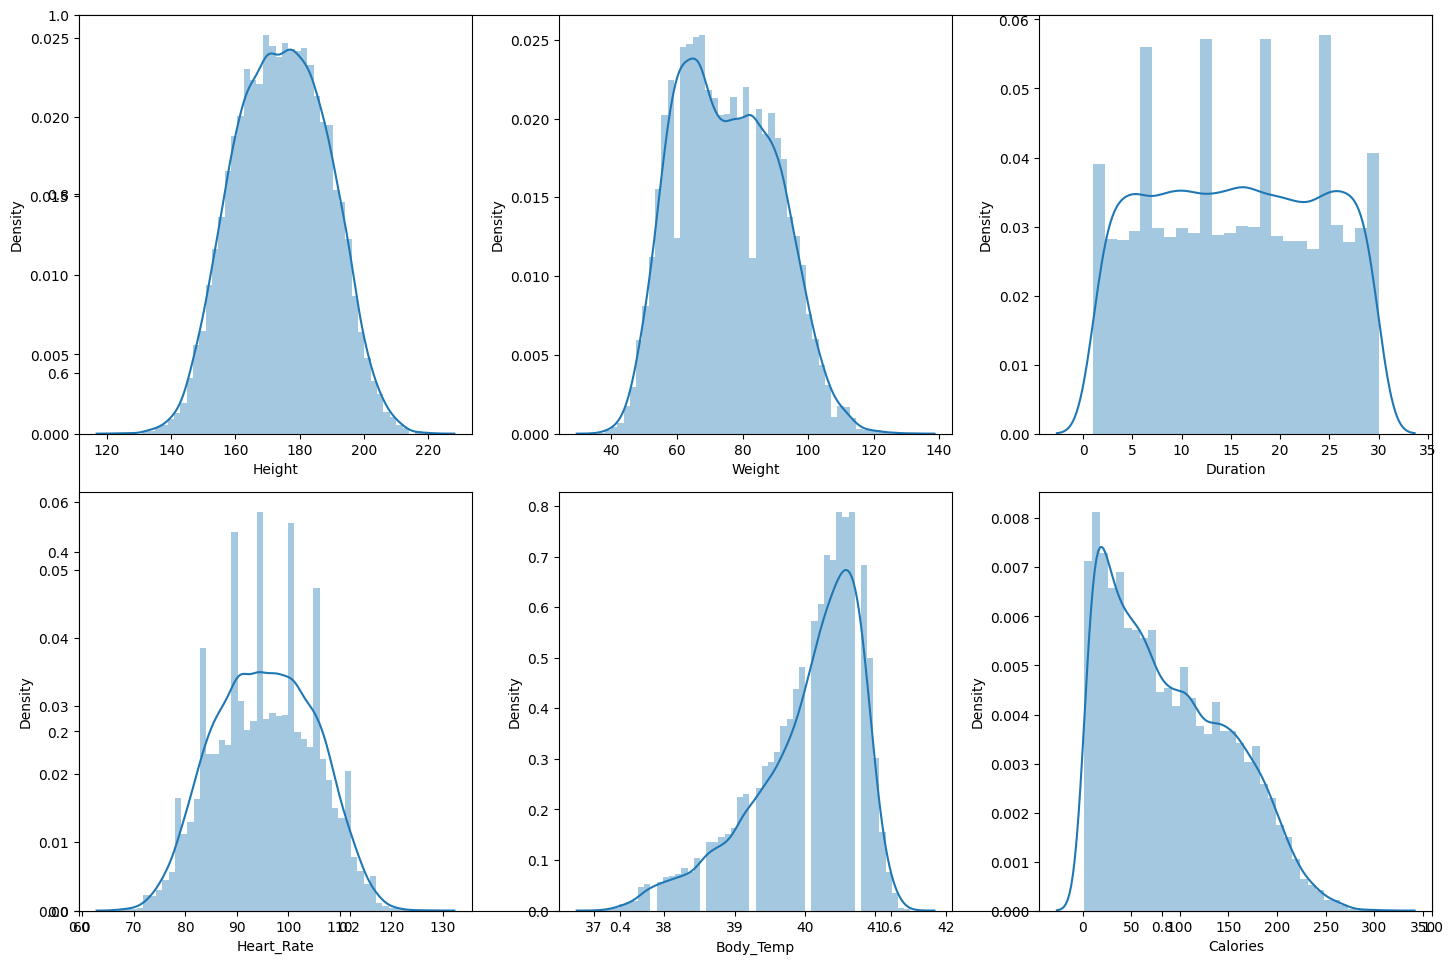

In [113]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features[:6]):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [114]:
df.replace({'male':0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,HRxDuration,WeightxDuration,Temp_centered
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,3045.0,2726.0,0.774547
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,1316.0,840.0,0.274547
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,440.0,395.0,-1.325453
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,1300.0,923.0,0.474547
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,810.0,580.0,-0.225453


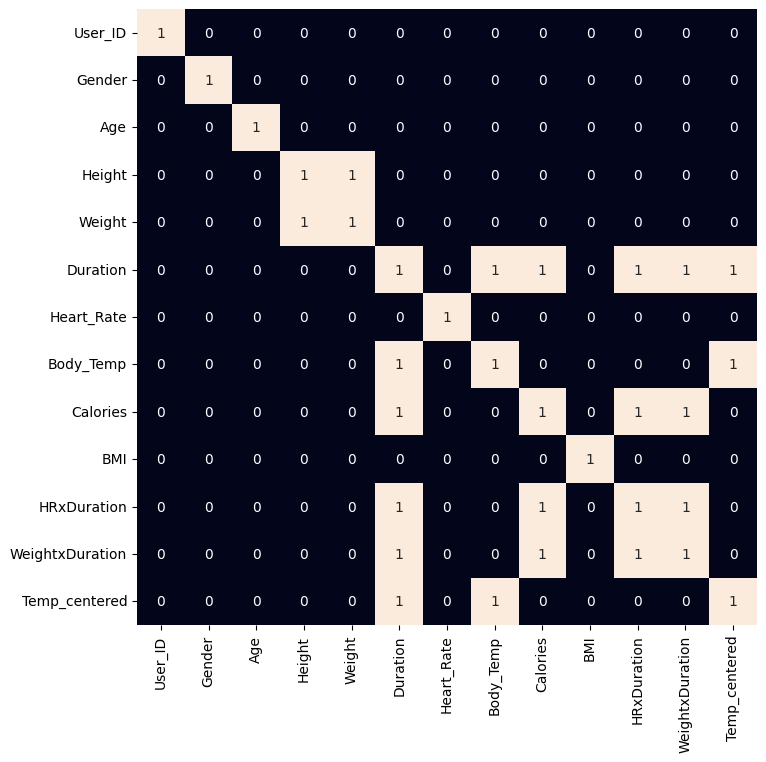

In [115]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

In [116]:
# Özellikler (X) ve hedef (y) tanımlama
y = df['Calories'].values
X = df.drop(columns=['Calories', 'User_ID'])  # User_ID kullanılmaz

In [117]:
# %% Pipeline + CV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

models = {
    "Ridge": Pipeline([("scaler", StandardScaler()), ("mdl", Ridge(alpha=1.0, random_state=42))]),
    "RandomForest": Pipeline([("scaler", StandardScaler()), ("mdl", RandomForestRegressor(
        n_estimators=400, max_depth=None, random_state=42))]),
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for name, pipe in models.items():
    scores = cross_val_score(pipe, X, y, cv=cv, scoring=mae_scorer, n_jobs=-1)
    print(f"{name} | MAE (mean±std): {-scores.mean():.2f} ± {scores.std():.2f}")


Ridge | MAE (mean±std): 5.35 ± 0.04
RandomForest | MAE (mean±std): 1.70 ± 0.04


In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_pipe = Pipeline([("scaler", StandardScaler()),
                    ("mdl", RandomForestRegressor(random_state=42))])

param_dist = {
    "mdl__n_estimators": randint(200, 800),
    "mdl__max_depth": randint(3, 30),
    "mdl__min_samples_split": randint(2, 20),
    "mdl__min_samples_leaf": randint(1, 10),
    "mdl__max_features": ["auto", "sqrt", 0.5, 0.7]
}

search = RandomizedSearchCV(
    rf_pipe, param_distributions=param_dist,
    n_iter=40, scoring=mae_scorer, cv=5, n_jobs=-1, random_state=42, verbose=1
)
search.fit(X, y)
best_mae = -search.best_score_
print("Best MAE:", round(best_mae, 2))
print("Best params:", search.best_params_)
best_model = search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best MAE: 1.77
Best params: {'mdl__max_depth': 19, 'mdl__max_features': 0.7, 'mdl__min_samples_leaf': 3, 'mdl__min_samples_split': 4, 'mdl__n_estimators': 488}


In [119]:
import os, joblib

# klasör yoksa oluştur
os.makedirs("models", exist_ok=True)

# modeli kaydet
joblib.dump(best_model, "models/best_rf.joblib")

['models/best_rf.joblib']

In [120]:
# %% Kaydet & örnek tahmin
import joblib
joblib.dump(best_model, "models/best_rf.joblib")

# Tek satırlık örnek tahmin için:
# (X’in bir satırını alalım)
sample = X.iloc[[0]]
print("Sample pred:", best_model.predict(sample)[0])

Sample pred: 229.97984137333523


In [121]:
import pandas as pd

gender_num   = 0  # male=0, female=1 (sen nasıl encode ettiysen öyle!)
age          = 30
height       = 175
weight       = 70
duration     = 20
heart_rate   = 110
body_temp    = 40.0

row = pd.DataFrame([{
    "Gender": gender_num, "Age": age, "Height": height, "Weight": weight,
    "Duration": duration, "Heart_Rate": heart_rate, "Body_Temp": body_temp,
    "BMI": BMI, "HRxDuration": HRxDuration, "WeightxDuration": WeightxDuration, "Temp_centered": Temp_centered
}])

print("Custom pred:", best_model.predict(row)[0])


Custom pred: 126.7082376014241


In [122]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

Model training e giriyoruz

In [123]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
Y_train, Y_val = train_test_split(features, target,
                                  test_size=0.1,
                                  random_state=22)
X_train.shape, X_val.shape

((13500, 9), (1500, 9))

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [125]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  6.619544282332077
Validation Error :  6.724160942542728

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  0.879737457478488
Validation Error :  1.3603036877711614

Lasso() : 
Training Error :  7.104103246871438
Validation Error :  7.13350